## Read Data

In [1]:
import os
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from difflib import get_close_matches
from sklearn.feature_extraction.text import TfidfVectorizer



In [2]:
def getWordsOfTxt(namePath,nameFile):

    input_file_name = os.path.join("data/"+namePath, nameFile+".txt")

    arrTotal = []
    arrCurrent = []
    with open(input_file_name, "r") as input_file:
        
        for linea in input_file:
            word = linea.strip()
            # print(word)
            if word == '##':
                arrTotal.append(arrCurrent)
                arrCurrent = []
            else:
                arrCurrent.append(word)
    return arrTotal


In [3]:
arrTitleLem = getWordsOfTxt("wordNetLemmatizerTitle","wordNetLemmatizerTitleUpdateFinal")
arrKeywordLem = getWordsOfTxt("wordNetLemmatizerKeyword","wordNetLemmatizerKeywordFinal")
arrTitleStem = getWordsOfTxt("porterStemmerTitle","porterStemmerTitleFinal")
arrKeywordStem = getWordsOfTxt("porterStemmerKeyword","porterStemmerKeywordFinal")



In [4]:
arrTitleLem

[['integration', 'community', 'process-oriented', 'structure'],
 ['outcome',
  'synchronously',
  'interaction',
  'small',
  'learning',
  'workplace',
  'determining',
  'factor',
  'online',
  'acceptance',
  'group'],
 ['weblogs',
  'sharing',
  'learning',
  'knowledge',
  'space',
  'using',
  'information'],
 ['management',
  'oriented',
  'pre-built',
  'implementing',
  'method',
  'modelling',
  'knowledge',
  'space',
  'architecture',
  'information',
  'process'],
 ['novel',
  'visualization',
  'transfer',
  'project',
  'map',
  'evaluation',
  'knowledge',
  'long-term',
  'application',
  'tube'],
 ['activity-based',
  'management',
  'system',
  'knowledge',
  'reconciling',
  'approach',
  'workflow'],
 ['human',
  'toolkit',
  'technological',
  'design',
  'methodology',
  'network',
  'factor',
  'integrate',
  'km',
  'knowledge-intensive',
  'organisational',
  'within'],
 ['analysing',
  'business',
  'capturing',
  'kmdl',
  'knowledge-intensive',
  'improving

## Preprocesamiento por Categorias

In [5]:
df_clean = pd.read_csv('data/dataClean/df_clean.csv')

In [6]:
df_categories = pd.DataFrame({'Categories': df_clean['FirstLevel'].drop_duplicates(), 'Values': {}}).sort_values('Categories').reset_index(drop=True)
g = df_clean['FirstLevel'].value_counts()

i__ = 0
for key, value in g.items():
    mask = df_categories['Categories'] == key
    df_categories.loc[mask, 'Values'] = value
    i__+=1

df_categories

/tmp/ipykernel_926/3913633337.py:1: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  df_categories = pd.DataFrame({'Categories': df_clean['FirstLevel'].drop_duplicates(), 'Values': {}}).sort_values('Categories').reset_index(drop=True)


,Categories,Values
0,A,35.0
1,B,48.0
2,C,121.0
3,D,311.0
4,E,52.0
5,F,296.0
6,G,106.0
7,H,377.0
8,I,226.0
9,J,86.0


### Verificando la cantidad de datos por categoria

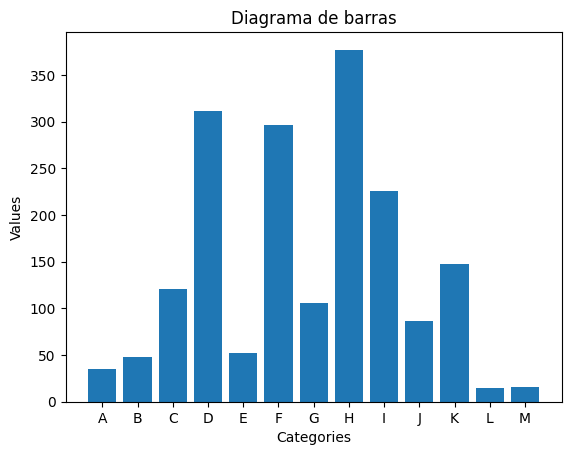

In [7]:

i__ = 0
for key, value in g.items():
    mask = df_categories['Categories'] == key
    df_categories.loc[mask, 'Values'] = value
    i__+=1
plt.bar(df_categories['Categories'], df_categories['Values'])
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Diagrama de barras')
plt.show()

## Analysis by Category

In [8]:
grouped_df = pd.read_csv('data/dataClean/grouped_df.csv')
grouped_df

,ID,Title,Keywords,FirstLevel
0,1,Integration of Communities into Process-Orient...,"cooperative knowledge generation,knowledge co...",['H']
1,3,Small Groups Learning Synchronously Online at ...,"professional training,workplace learning,compu...",['H' 'J']
2,4,Using Weblogs for Knowledge Sharing and Learni...,"Experience-based Information System,wiki,weblo...",['A' 'D' 'H' 'J' 'K']
3,5,Modelling and Implementing Pre-built Informati...,"modelling method,introduction method,context-a...",['H' 'I' 'J']
4,6,Tube Map Visualization: Evaluation of a Novel ...,"knowledge visualization,information visualiza...",['H']
...,...,...,...,...
1097,1473,Eduquito: Virtual Environment for Digital Incl...,"virtual environment,accessibility,persons with...",['K']
1098,1474,Development of a Web Application for Managemen...,"learning styles,Web-based application",['K']
1099,1475,Semantic Spiral Timelines Used as Support for ...,"visualization,e-learning,timeline,spiral,Moodle",['L' 'M']
1100,1476,Visualization of Syntax Trees for Language Pro...,"syntax trees,visualization,educational software",['D' 'K']


In [9]:
grouped_df['titleCleanedLem'] = [' '.join(arr) for arr in arrTitleLem]
grouped_df['keywordCleanedLem'] = [' '.join(arr) for arr in arrKeywordLem]
grouped_df['titleCleanedStem'] = [' '.join(arr) for arr in arrTitleStem]
grouped_df['keywordCleanedStem'] = [' '.join(arr) for arr in arrKeywordStem]



In [10]:
grouped_df

,ID,Title,Keywords,FirstLevel,titleCleanedLem,keywordCleanedLem,titleCleanedStem,keywordCleanedStem
0,1,Integration of Communities into Process-Orient...,"cooperative knowledge generation,knowledge co...",['H'],integration community process-oriented structure,generation community cooperative process-orien...,process-ori commun structur integr,knowledg knowledge-intens gener wiki process-o...
1,3,Small Groups Learning Synchronously Online at ...,"professional training,workplace learning,compu...",['H' 'J'],outcome synchronously interaction small learni...,cooperative learning workplace computer-suppor...,outcom interact small factor synchron learn on...,assur profession studi empir learn train compu...
2,4,Using Weblogs for Knowledge Sharing and Learni...,"Experience-based Information System,wiki,weblo...",['A' 'D' 'H' 'J' 'K'],weblogs sharing learning knowledge space using...,information system agent learning experience-b...,knowledg share learn weblog space use inform,experience-bas system agent pedagog arrang lea...
3,5,Modelling and Implementing Pre-built Informati...,"modelling method,introduction method,context-a...",['H' 'I' 'J'],management oriented pre-built implementing met...,filtering collaborative management business me...,manag knowledg architectur pre-built implement...,manag filter knowledg inform collabor method i...
4,6,Tube Map Visualization: Evaluation of a Novel ...,"knowledge visualization,information visualiza...",['H'],novel visualization transfer project map evalu...,communication visualization visual storytellin...,novel evalu visual transfer knowledg project m...,manag visual knowledg inform metaphor project ...
...,...,...,...,...,...,...,...,...
1097,1473,Eduquito: Virtual Environment for Digital Incl...,"virtual environment,accessibility,persons with...",['K'],need environment people virtual educational sp...,environment person virtual disability accessib...,educ need digit inclus environ peopl virtual s...,environ person virtual disabl access
1098,1474,Development of a Web Application for Managemen...,"learning styles,Web-based application",['K'],management learning web style development appl...,application learning web-based style,manag develop web learn style applic,applic web-bas style learn
1099,1475,Semantic Spiral Timelines Used as Support for ...,"visualization,e-learning,timeline,spiral,Moodle",['L' 'M'],used spiral timeline support e-learning semantic,visualization spiral timeline e-learning moodle,spiral timelin support semant use e-learn,moodl visual spiral timelin e-learn
1100,1476,Visualization of Syntax Trees for Language Pro...,"syntax trees,visualization,educational software",['D' 'K'],visualization tree course syntax language proc...,visualization tree educational software syntax,visual tree languag syntax cours process,educ visual tree syntax softwar


In [11]:
print("title: ", grouped_df.iloc[1101]['Title'])
print("keyword: ", grouped_df.iloc[1101]['Keywords'])
print("title Cleaned Lem: ",grouped_df.iloc[1101]['titleCleanedLem'])
print("keyword Cleaned Lem : ", grouped_df.iloc[1101]['keywordCleanedLem'])
print("title Cleaned Stem: ", grouped_df.iloc[1101]['titleCleanedStem'])
print("keyword Cleaned Stem:", grouped_df.iloc[1101]['keywordCleanedStem'])

title:  Learning to Program with COALA, a Distributed Computer Assisted Environment
keyword:  learning programming,intelligent tutoring system
title Cleaned Lem:  environment coala learning computer distributed assisted program
keyword Cleaned Lem :  programming system learning tutoring intelligent
title Cleaned Stem:  assist coala program environ learn distribut comput
keyword Cleaned Stem: system tutor learn intellig program


In [12]:
dataByCategories = []
for cat in df_categories['Categories']:
    dataByCategory = grouped_df[grouped_df['FirstLevel'].apply(lambda x: cat in x)].reset_index(drop=True)
    dataByCategories.append(dataByCategory)

In [13]:
dataByCategories[0]

,ID,Title,Keywords,FirstLevel,titleCleanedLem,keywordCleanedLem,titleCleanedStem,keywordCleanedStem
0,4,Using Weblogs for Knowledge Sharing and Learni...,"Experience-based Information System,wiki,weblo...",['A' 'D' 'H' 'J' 'K'],weblogs sharing learning knowledge space using...,information system agent learning experience-b...,knowledg share learn weblog space use inform,experience-bas system agent pedagog arrang lea...
1,10,The Role of Knowledge Management Solutions in ...,"knowledge management,business process,enterpri...",['A' 'H'],management solution business knowledge role en...,research market management business knowledge ...,knowledg manag enterpris role solut busi process,knowledg manag research market enterpris tool ...
2,21,The Atomic Manifesto,"atomicity,transactions,dependability,formal me...",['A'],manifesto atomic,programming formal atomicity hardware method d...,manifesto atom,formal depend method languag transact atom har...
3,151,Managing the KM Trade-Off: Knowledge Centraliz...,"intellectual capital,knowledge markets,mental ...",['A' 'H'],versus distribution knowledge km trade-off cen...,organizational mental market community retrosp...,knowledg manag central km trade-off versu dist...,organiz knowledg mental market capit practic r...
4,155,Communities of Practice: An Integrated Technol...,"communities of practice,knowledge management,e...",['A' 'C' 'H' 'K'],community practice integrated technology persp...,community management content intranet extranet...,perspect practic technolog integr commun,manag knowledg enterpris content intranet extr...
5,160,"Etiquette, Empathy and Trust in Communities of...","tacit knowledge,explicit knowledge,social norm...",['A' 'H' 'I'],trust community etiquette social practice step...,trust community etiquette social norm tacit kn...,stepping-ston empathi trust social etiquett ca...,knowledg trust social etiquett norm sociabl ca...
6,172,Knowledge Integration as a Source of Competiti...,"knowledge integration,knowledge management,str...",['A' 'H'],large competitive croatian integration source ...,human competitive management integration knowl...,larg knowledg enterpris croatian competit adva...,human manag knowledg competit advantag resourc...
7,173,A Systematic Approach for Knowledge Audit Anal...,"knowledge audit,knowledge inventory,knowledge ...",['A'],audit mapping analysis integration flow knowle...,audit analysis social network flow map knowled...,analysi knowledg audit systemat flow map appro...,analysi knowledg audit social network flow map...
8,177,Knowledge Management Analysis of the Research ...,"Knowledge Management at Universities,Research ...",['A' 'E' 'K'],research management public analysis knowledge ...,research management analysis knowledge develop...,analysi manag research knowledg transfer publi...,analysi manag research knowledg develop univer...
9,178,SELaKT - Social Network Analysis as a Method f...,"knowledge networks,collaboration,communities o...",['A' 'H' 'J'],transfer sustainable social analysis network m...,research sharing management community social a...,analysi knowledg transfer social network metho...,analysi manag research knowledg social distrib...


In [14]:
def getDataByCategories(dataByCategories,titleName,keywordName):
    docByCategories_t = []
    docList_t = []
    docByCategories_k = []
    docList_k = []
    for dataByCat in dataByCategories:
        
        arrByDoc_t = []
        arrByDocJoin_t = []
        arrByDoc_k = []
        arrByDocJoin_k = []

        for index, row in dataByCat.iterrows():
            title = row[titleName].split()
            keyword = row[keywordName].split()
            # joinTK = list(set(title + keyword))

            # dataPre = []
            # for word in joinTK:
            #     if not any(get_close_matches(word, dataPre, n=1, cutoff=0.8)):
            #         dataPre.append(word)
            
            # 80% similarity
            dataPre_t = []
            for word in title:
                if not any(get_close_matches(word, dataPre_t, n=1, cutoff=0.8)):
                    dataPre_t.append(word)
            
            dataPre_k = []
            for word in keyword:
                if not any(get_close_matches(word, dataPre_k, n=1, cutoff=0.8)):
                    dataPre_k.append(word)
                        
            # print("title: ", title)
            # print("keyword: ",keyword)
            # print("join: ", joinTK)
            # print("prepro data", dataPre)
            
            # joinDoc = ' '.join(dataPre)
            # arrByDocJoin.append(joinDoc)
            # arrByDoc.append(dataPre) # arreglo de arreglos

            joinDoc_t = ' '.join(dataPre_t)
            arrByDocJoin_t.append(joinDoc_t) # all in sentence of titles

            joinDoc_k = ' '.join(dataPre_k)
            arrByDocJoin_k.append(joinDoc_k)# all in sentence of keywords
            
            arrByDoc_t.append(dataPre_t)# list of titles
            arrByDoc_k.append(dataPre_k)# list of keywords


        print("title data list by title", arrByDoc_t)
        print("title data sentence by title", arrByDocJoin_t)
        print("keyword data list by keyword", arrByDoc_k)
        print("keyword data setence by keyword", arrByDocJoin_k)
        #  [''.join(arr) for arr in arrDocJoin]
        
        docList_t.append(arrByDoc_t)
        docByCategories_t.append(arrByDocJoin_t)

        docList_k.append(arrByDoc_k)
        docByCategories_k.append(arrByDocJoin_k)
    return docByCategories_t, docList_t, docByCategories_k, docList_k 
    # print("union todo: ", arrDocJoin)
    # print("union todo: ", len(arrDocJoin))

In [15]:
docByCategories_t,docListByCategories_t, docByCategories_k,docListByCategories_k = getDataByCategories(dataByCategories,"titleCleanedLem","keywordCleanedLem")

title data list by title [['weblogs', 'sharing', 'learning', 'knowledge', 'space', 'using', 'information'], ['management', 'solution', 'business', 'knowledge', 'role', 'enterprise', 'process'], ['manifesto', 'atomic'], ['versus', 'distribution', 'knowledge', 'km', 'trade-off', 'centralization', 'managing'], ['community', 'practice', 'integrated', 'technology', 'perspective'], ['trust', 'community', 'etiquette', 'social', 'practice', 'stepping-stones', 'empathy', 'capital'], ['large', 'competitive', 'croatian', 'integration', 'source', 'knowledge', 'advantage', 'enterprise'], ['audit', 'mapping', 'analysis', 'integration', 'flow', 'knowledge', 'systematic', 'approach', 'inventory'], ['research', 'management', 'public', 'analysis', 'knowledge', 'development', 'hero', 'case', 'university', 'transference', 'process'], ['transfer', 'sustainable', 'social', 'analysis', 'network', 'method', 'selakt', 'knowledge', 'localisation', 'expert'], ['visual', 'sharing', 'archiving', 'cross-disciplinar

In [16]:
print(len(docByCategories_t[0]))
print(len(docByCategories_k[0]))

35
35


In [17]:
docListByCategories_t[0]

[['weblogs',
  'sharing',
  'learning',
  'knowledge',
  'space',
  'using',
  'information'],
 ['management',
  'solution',
  'business',
  'knowledge',
  'role',
  'enterprise',
  'process'],
 ['manifesto', 'atomic'],
 ['versus',
  'distribution',
  'knowledge',
  'km',
  'trade-off',
  'centralization',
  'managing'],
 ['community', 'practice', 'integrated', 'technology', 'perspective'],
 ['trust',
  'community',
  'etiquette',
  'social',
  'practice',
  'stepping-stones',
  'empathy',
  'capital'],
 ['large',
  'competitive',
  'croatian',
  'integration',
  'source',
  'knowledge',
  'advantage',
  'enterprise'],
 ['audit',
  'mapping',
  'analysis',
  'integration',
  'flow',
  'knowledge',
  'systematic',
  'approach',
  'inventory'],
 ['research',
  'management',
  'public',
  'analysis',
  'knowledge',
  'development',
  'hero',
  'case',
  'university',
  'transference',
  'process'],
 ['transfer',
  'sustainable',
  'social',
  'analysis',
  'network',
  'method',
  'selakt

In [18]:
print(docByCategories_t[0][0])
print(docListByCategories_t[0][0])

print(docByCategories_k[0][0])
print(docListByCategories_k[0][0])

weblogs sharing learning knowledge space using information
['weblogs', 'sharing', 'learning', 'knowledge', 'space', 'using', 'information']
information system agent learning experience-based weblog pedagogical space wiki micro-didactical arrangement
['information', 'system', 'agent', 'learning', 'experience-based', 'weblog', 'pedagogical', 'space', 'wiki', 'micro-didactical', 'arrangement']


## TF-IDF

In [19]:

# Crear un objeto TfidfVectorizer
vectorizer = TfidfVectorizer()

# Ajustar y transformar los documentos
tfidf_matrix = vectorizer.fit_transform(docByCategories[0])

# Obtener la lista de características (palabras)
features = vectorizer.get_feature_names_out()

# Obtener las puntuaciones TF-IDF
tfidf_scores = tfidf_matrix.toarray()

# Crear un diccionario que mapea las características a sus puntuaciones TF-IDF
tfidf_dict = {feature: score for feature, score in zip(features, tfidf_scores[0])}

# Imprimir las puntuaciones TF-IDF para el primer documento
print("Puntuaciones TF-IDF para el primer documento:")
for feature, score in tfidf_dict.items():
    print(f"{feature}: {score}")

NameError: name 'docByCategories' is not defined

In [23]:

def getTfIdf(docByCategories_x):
    tfIdfList = []

    for docByCategory in docByCategories_x:

        # Create a TfidfVectorizer object
        vectorizer = TfidfVectorizer()

        # Fit the vectorizer to the documents and calculate TF-IDF
        tfidf_matrix = vectorizer.fit_transform(docByCategory)

        # Get the features (words) in the order they appear in the TF-IDF matrix
        features = vectorizer.get_feature_names_out()

        # Create a Pandas DataFrame from the TF-IDF matrix
        tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=features)
        tfIdfList.append(tfidf_df)
    return tfIdfList

In [24]:
tfIdfList_t = getTfIdf(docByCategories_t)
tfIdfList_k = getTfIdf(docByCategories_k)

In [25]:
len(tfIdfList_t)

13

In [26]:
tfIdfList_t[0]['process']

0     0.000000
1     0.364532
2     0.000000
3     0.000000
4     0.000000
5     0.000000
6     0.000000
7     0.000000
8     0.264691
9     0.000000
10    0.000000
11    0.000000
12    0.000000
13    0.000000
14    0.000000
15    0.000000
16    0.000000
17    0.000000
18    0.000000
19    0.000000
20    0.000000
21    0.000000
22    0.000000
23    0.307516
24    0.000000
25    0.000000
26    0.000000
27    0.000000
28    0.000000
29    0.000000
30    0.000000
31    0.000000
32    0.000000
33    0.298856
34    0.000000
Name: process, dtype: float64

## List Doc and Delete common words

In [27]:
umbral = 0.2

In [28]:
def getRelevantWords(tfIdfList):
    
    cont = ord('A')
    relevantWordByCategories = []

    for tfIdfCat in tfIdfList:
        la_ = chr(cont)
        resultm2 = tfIdfCat.columns[tfIdfCat.gt(umbral).any()]
        # print(la_ + " :", resultm2)
        relevantWordByCategories.append([la_,resultm2])
        cont += 1
    return relevantWordByCategories

In [29]:
relevantWordByCategories_t = getRelevantWords(tfIdfList_t)
relevantWordByCategories_k = getRelevantWords(tfIdfList_k)

In [30]:
relevantWordByCategories_t

[['A',
  Index(['advantage', 'american', 'analysis', 'analyzing', 'application',
         'approach', 'archiving', 'area', 'aspect', 'assignment',
         ...
         'use', 'using', 'versus', 'video', 'visual', 'web', 'weblogs', 'wiki',
         'work', 'working'],
        dtype='object', length=183)],
 ['B',
  Index(['abstract', 'accelerate', 'accurate', 'activation', 'adder', 'aes',
         'algorithm', 'amcc', 'analog', 'application',
         ...
         'th', 'theoretical', 'thread', 'timed', 'upper', 'use', 'using',
         'verification', 'vision', 'wireless'],
        dtype='object', length=233)],
 ['C',
  Index(['abstract', 'access', 'accurate', 'activation', 'active', 'actor', 'ad',
         'adaptation', 'additional', 'address',
         ...
         'web', 'window', 'wireless', 'within', 'wonder', 'work', 'workflow',
         'workplace', 'yap', 'zrtp'],
        dtype='object', length=531)],
 ['D',
  Index(['abstract', 'abstraction', 'access', 'accurate', 'achieving',

In [31]:
relevantWordByCategories_k

[['A',
  Index(['absorptive', 'abstract', 'advantage', 'agent', 'allocation',
         'analysis', 'applied', 'archiving', 'arrangement', 'ashen',
         ...
         'university', 'video', 'view', 'visual', 'web', 'weblog', 'wiki',
         'work', 'worker', 'workplace'],
        dtype='object', length=202)],
 ['B',
  Index(['abstract', 'accurate', 'aes', 'aid', 'algorithm', 'amplifier',
         'analog', 'analysis', 'approximate', 'architecture',
         ...
         'ultrasonics', 'unix', 'unrolling', 'vector', 'verification', 'vhdl',
         'virtex', 'vliw', 'vlsi', 'wireless'],
        dtype='object', length=263)],
 ['C',
  Index(['abstract', 'abuse', 'access', 'actor', 'ad', 'adaptable', 'adaptation',
         'admissible', 'admission', 'adversarial',
         ...
         'vp', 'waiting', 'wap', 'web', 'wireless', 'work', 'workflow',
         'workload', 'www', 'zrtp'],
        dtype='object', length=558)],
 ['D',
  Index(['ables', 'abstract', 'abstraction', 'abuse', 'acce

In [32]:
i=0
for doc in docByCategories_k[0]:
    if "system" in doc:
        print(i,"system")
    i+=1


0 system
17 system
27 system


In [33]:
def getSelectedWordGroupedDf(arr,categories,relevantWordByCategories):
    
    relevantWordSelected = []
    for wordPairs in relevantWordByCategories:
        if wordPairs[0] in categories:
            relevantWordSelected.append(wordPairs)


    wordSelect = []
    for word in arr:
        cont = 0
        for wordsByCategory in relevantWordSelected:
            if word in wordsByCategory[1]:
                cont +=1
        if cont > 0:
            wordSelect.append(word)
    
    return wordSelect
    


In [46]:

def setNewWordsByCategories(relevantWordByCategories_t,relevantWordByCategories_k):
    selectedTitleWord_grouped_df = []
    selectedKeywordWord_grouped_df = []

    for index, row in grouped_df.iterrows():
        title_ = row['titleCleanedLem'].split()
        keyword_ = row['keywordCleanedLem'].split()
        categories = row['FirstLevel'] 
        # print(index)
        # print(title_)
        # print(keyword_)
        # print(categories)

        selectedTitleWord_grouped_df.append(getSelectedWordGroupedDf(title_,categories,relevantWordByCategories_t))
        
        selectedKeywordWord_grouped_df.append(getSelectedWordGroupedDf(keyword_,categories,relevantWordByCategories_k))

    return selectedTitleWord_grouped_df, selectedKeywordWord_grouped_df
        
    # for words in relevantWordByCategories_t:
    #     if word[0] in categories: 
    #     print(word[0])
    #     if(word in title_):

    # for word in relevantWordByCategories_k:
    #     if(word in keyword_)

In [47]:
selectedTitleWord_grouped_df, selectedKeywordWord_grouped_df = setNewWordsByCategories(relevantWordByCategories_t,relevantWordByCategories_k)

In [36]:
print(selectedTitleWord_grouped_df)
print(selectedKeywordWord_grouped_df)

[['integration', 'community', 'structure'], ['outcome', 'synchronously', 'interaction', 'small', 'learning', 'workplace', 'determining', 'factor', 'online', 'acceptance', 'group'], ['weblogs', 'sharing', 'learning', 'knowledge', 'space', 'using', 'information'], ['management', 'oriented', 'implementing', 'method', 'modelling', 'knowledge', 'space', 'architecture', 'information', 'process'], ['novel', 'visualization', 'transfer', 'project', 'map', 'evaluation', 'knowledge', 'application', 'tube'], ['management', 'system', 'knowledge', 'reconciling', 'approach', 'workflow'], ['human', 'toolkit', 'technological', 'design', 'methodology', 'network', 'factor', 'integrate', 'km', 'organisational', 'within'], ['analysing', 'business', 'capturing', 'kmdl', 'improving', 'process'], ['management', 'solution', 'business', 'knowledge', 'role', 'enterprise', 'process'], ['design', 'knowledge', 'modeling', 'work', 'infrastructure'], ['hierarchy', 'knowledge', 'infrastructure', 'process', 'model'], [

In [37]:
newgrouped_df = grouped_df.copy()


In [38]:
newgrouped_df.head(5)

,ID,Title,Keywords,FirstLevel,titleCleanedLem,keywordCleanedLem,titleCleanedStem,keywordCleanedStem
0,1,Integration of Communities into Process-Orient...,"cooperative knowledge generation,knowledge co...",['H'],integration community process-oriented structure,generation community cooperative process-orien...,process-ori commun structur integr,knowledg knowledge-intens gener wiki process-o...
1,3,Small Groups Learning Synchronously Online at ...,"professional training,workplace learning,compu...",['H' 'J'],outcome synchronously interaction small learni...,cooperative learning workplace computer-suppor...,outcom interact small factor synchron learn on...,assur profession studi empir learn train compu...
2,4,Using Weblogs for Knowledge Sharing and Learni...,"Experience-based Information System,wiki,weblo...",['A' 'D' 'H' 'J' 'K'],weblogs sharing learning knowledge space using...,information system agent learning experience-b...,knowledg share learn weblog space use inform,experience-bas system agent pedagog arrang lea...
3,5,Modelling and Implementing Pre-built Informati...,"modelling method,introduction method,context-a...",['H' 'I' 'J'],management oriented pre-built implementing met...,filtering collaborative management business me...,manag knowledg architectur pre-built implement...,manag filter knowledg inform collabor method i...
4,6,Tube Map Visualization: Evaluation of a Novel ...,"knowledge visualization,information visualiza...",['H'],novel visualization transfer project map evalu...,communication visualization visual storytellin...,novel evalu visual transfer knowledg project m...,manag visual knowledg inform metaphor project ...


In [39]:
newgrouped_df['titleRelevantLem'] = [' '.join(words) for words in selectedTitleWord_grouped_df]
newgrouped_df['keywordRelevantLem'] = [' '.join(words) for words in selectedKeywordWord_grouped_df]


In [40]:
newgrouped_df.head(5)

,ID,Title,Keywords,FirstLevel,titleCleanedLem,keywordCleanedLem,titleCleanedStem,keywordCleanedStem,titleRelevantLem,keywordRelevantLem
0,1,Integration of Communities into Process-Orient...,"cooperative knowledge generation,knowledge co...",['H'],integration community process-oriented structure,generation community cooperative process-orien...,process-ori commun structur integr,knowledg knowledge-intens gener wiki process-o...,integration community structure,generation community cooperative knowledge wik...
1,3,Small Groups Learning Synchronously Online at ...,"professional training,workplace learning,compu...",['H' 'J'],outcome synchronously interaction small learni...,cooperative learning workplace computer-suppor...,outcom interact small factor synchron learn on...,assur profession studi empir learn train compu...,outcome synchronously interaction small learni...,cooperative learning workplace training assura...
2,4,Using Weblogs for Knowledge Sharing and Learni...,"Experience-based Information System,wiki,weblo...",['A' 'D' 'H' 'J' 'K'],weblogs sharing learning knowledge space using...,information system agent learning experience-b...,knowledg share learn weblog space use inform,experience-bas system agent pedagog arrang lea...,weblogs sharing learning knowledge space using...,information system agent learning weblog pedag...
3,5,Modelling and Implementing Pre-built Informati...,"modelling method,introduction method,context-a...",['H' 'I' 'J'],management oriented pre-built implementing met...,filtering collaborative management business me...,manag knowledg architectur pre-built implement...,manag filter knowledg inform collabor method i...,management oriented implementing method modell...,filtering collaborative management business me...
4,6,Tube Map Visualization: Evaluation of a Novel ...,"knowledge visualization,information visualiza...",['H'],novel visualization transfer project map evalu...,communication visualization visual storytellin...,novel evalu visual transfer knowledg project m...,manag visual knowledg inform metaphor project ...,novel visualization transfer project map evalu...,communication visualization visual storytellin...


In [41]:
print("title: ", newgrouped_df.iloc[75]['Title'])
print("keyword: ", newgrouped_df.iloc[75]['Keywords'])
print("title Cleaned Lem: ",newgrouped_df.iloc[75]['titleCleanedLem'])
print("keyword Cleaned Lem : ", newgrouped_df.iloc[75]['keywordCleanedLem'])
print("title Relevant Stem: ", newgrouped_df.iloc[75]['titleRelevantLem'])
print("keyword Relevant Stem:", newgrouped_df.iloc[75]['keywordRelevantLem'])

title:  Network Attack Scenarios Extraction and Categorization by Mining IDS Alert Streams
keyword:  network security,,intrusion detection,first-order logics,resolution
title Cleaned Lem:  categorization alert id network attack mining extraction stream scenario
keyword Cleaned Lem :  resolution intrusion security network first-order detection logic
title Relevant Stem:  categorization alert id network attack mining extraction stream scenario
keyword Relevant Stem: resolution intrusion security network detection logic


In [42]:
cont = 0
for item1, item2 in zip(newgrouped_df['titleCleanedLem'], newgrouped_df['titleRelevantLem']):
    if len(item1) != len(item2):
        print("Title Cleaned: ", item1.split())
        print("Title Relevant: ", item2.split())
        cont+=1

Title Cleaned:  ['integration', 'community', 'process-oriented', 'structure']
Title Relevant:  ['integration', 'community', 'structure']
Title Cleaned:  ['management', 'oriented', 'pre-built', 'implementing', 'method', 'modelling', 'knowledge', 'space', 'architecture', 'information', 'process']
Title Relevant:  ['management', 'oriented', 'implementing', 'method', 'modelling', 'knowledge', 'space', 'architecture', 'information', 'process']
Title Cleaned:  ['novel', 'visualization', 'transfer', 'project', 'map', 'evaluation', 'knowledge', 'long-term', 'application', 'tube']
Title Relevant:  ['novel', 'visualization', 'transfer', 'project', 'map', 'evaluation', 'knowledge', 'application', 'tube']
Title Cleaned:  ['activity-based', 'management', 'system', 'knowledge', 'reconciling', 'approach', 'workflow']
Title Relevant:  ['management', 'system', 'knowledge', 'reconciling', 'approach', 'workflow']
Title Cleaned:  ['human', 'toolkit', 'technological', 'design', 'methodology', 'network', 'f

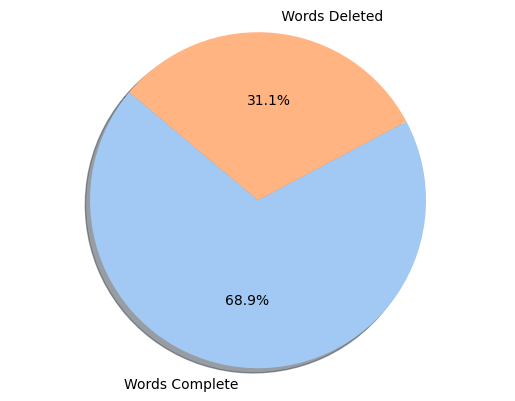

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Datos para el diagrama circular
labels = 'Words Complete',' Words Deleted'
sizes = [len(newgrouped_df)-cont, cont]  # Porcentajes

# Selecciona una paleta de colores armoniosos de seaborn
colors = sns.color_palette("pastel")

# Crea el diagrama circular
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')

# Muestra el diagrama circular
plt.show()


## Saves WordsList in CSV


In [66]:
output = os.path.join("data/dataClean/", "newgrouped_df.csv")
newgrouped_df.to_csv(output, index=False)

## Setting Words by Categories

In [60]:
def setTxtByCategories(nameFile,relevantWordByCategories):
    
    
    for item in relevantWordByCategories:
        cat, words = item
        listWords = words.to_list()
        output_file_name = os.path.join("data/dataByCategories/"+nameFile, cat+".txt")

        # Crea un archivo con el nombre correspondiente y escribe las palabras
        with open(output_file_name, "w") as file:
            for word in listWords:
                file.write(word + '\n')

### title

In [63]:
setTxtByCategories("title",relevantWordByCategories_t)

### keyword

In [64]:
setTxtByCategories("keyword",relevantWordByCategories_k)